In [4]:
## programming | python (scikit) web | html (d3, git) platform | sql, aws

import pickle
import string
import itertools
import scipy
import json

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

%matplotlib inline

In [38]:
r_state = 8
topic = "all"

In [39]:
with open(topic+"_authors.pkl", 'r') as out_auths:
    authors = pickle.load(out_auths)
#with open(topic+"_labels.pkl", 'r') as las:
#    author_labels = pickle.load(las)
#print author_labels

In [40]:
#with open(topic+"_auth_sents.pkl", 'r') as ins:
#    sents = pickle.load(ins)
if topic == "all":
    with open(topic+"_topics_authors.pkl", 'r') as tains:
        topics_authors = pickle.load(tains)
    print topics_authors[:2], topics_authors[-2:]   
with open(topic+"_labels.pkl", 'r') as las:
    labels = pickle.load(las)
    print labels

[(1, u"Sean O'Hagan"), (1, u"Sean O'Hagan")] [(4, u'Guardian sport'), (4, u'Guardian sport')]
[(1, 'arts'), (2, 'politics'), (3, 'science'), (4, 'sports')]


In [41]:
#Sentence features
#Sentence length, avg word length, abs(log(punc_freq)), abs(log(stopword_freq))
#with open(topic+"_features.pkl", 'r') as outs:
#    features = pickle.load(outs)
with open(topic+"_features.pkl", 'r') as outs:
    features = pickle.load(outs)
print features[0]
print len(features)

with open(topic+"_raw_features.pkl", 'r') as rfouts:
    rf_counts = pickle.load(rfouts)
print rf_counts[0]

[27, 4.703703703703703, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.151039905898646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.151039905898646, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.151039905898646, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 4.844187086458591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
11

In [42]:
def run_k_means(X, k):
    model = KMeans(n_clusters=k, max_iter=100, random_state=r_state) #init='k-means++'
    model.fit(X)
    print("Top terms per cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    
    #terms = raw_features
    terms = rf_counts
    #print order_centroids
    for i in range(len(model.cluster_centers_)):
        print "Cluster %d:" % i,
        for ind in order_centroids[i, :10]:
            print terms[0][ind][0], 
            #f_ind = features.index(ind)
            #print f_ind
            #print ' %s' % terms
        print
    return model

In [43]:
k2 = 6 #5, 6
print topic, "sentence features"
feature_model = run_k_means(features, k2)

all sentence features
Top terms per cluster:
Cluster 0: len_s . len_w the , of a to and in
Cluster 1: len_s len_w . the , a to of in and
Cluster 2: len_s . len_w , the of and to a in
Cluster 3: len_s for to and 's what we this a –
Cluster 4: len_s . len_w , the of and to a in
Cluster 5: len_s . and to , a len_w of the in


In [8]:
fks = range(2,16)
f_inertias = []
for k in fks:
    print k,
    model = KMeans(n_clusters=k, max_iter=100, random_state=r_state) #init='k-means++'
    model.fit(features)
    f_inertias.append(model.inertia_)

2 3 4 5 6 7 8 9 10 11 12 13 14 15


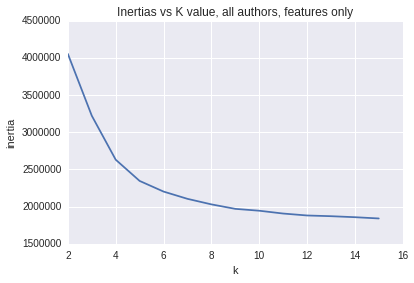

In [9]:
ax = plt.subplot(111)
plt.plot(fks, f_inertias)
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Inertias vs K value, all authors, features only")
plt.show()

In [44]:
cluster_numbers_f = feature_model.predict(features)
print cluster_numbers_f[:10]

[0 4 0 0 4 0 0 1 0 4]


In [45]:
f_centroids = feature_model.cluster_centers_
print f_centroids.shape

(6, 166)


In [46]:
#def node(index_, cluster_, authorname_, topic_):
#    index = index_
#    cluster = cluster_
#    authorname = authorname_
#    topic = topic_
    
    

In [47]:
#node(1,2,3,4)
#print node.cluster

In [48]:
#calculate which cluster each sentence belongs to
c_labels_f = range(f_centroids.shape[0])
clusters_dict_f = {el:[] for el in c_labels_f}
#print clusters_dict_all
#count = 0

for i, cna in enumerate(cluster_numbers_f):
    clusters_dict_f[cna].append(i)

#print clusters_dict_f[len(c_labels_f)-1]
print len(clusters_dict_f[0])

3847


In [49]:
mins = []
for lab, inds in clusters_dict_f.iteritems():
    xs = []
    print lab
    #print inds
    mindist = (9999999,9999,9999, len(inds))
    for ind in inds:
        #nodes.append({"index": ind, "cluster": lab, "author": topics_authors[ind][1], \
        #              "topic": labels[authors[ind]-1][1]})
        #print ind
        xs.append(features[ind])
        
        dist = scipy.spatial.distance.euclidean(features[ind], f_centroids[lab])
        if dist < mindist[0]:
            mindist = (dist, lab, ind, len(inds))
    mins.append(mindist)
print mins

0
1
2
3
4
5
[(5.4388337922993175, 0, 11214, 3847), (3.139681295275067, 1, 1128, 3744), (12.161924018354103, 2, 8766, 1089), (29.85951730891869, 3, 744, 16), (9.0803464076544742, 4, 1114, 2736), (17.102440854228657, 5, 5048, 211)]


In [50]:
for m in mins:
    print "cluster:", m[1]
    if topic == "all":
        print sorted(rf_counts[m[2]], key=lambda x:(-x[1],x[0]))[:20]
        print "topic: %s, author: %s, and %s similar sentences" \
              %(labels[authors[m[2]]-1][1], topics_authors[m[2]][1], m[3]-1)
        print 
    else:
        print sorted(rf_counts[m[2]], key=lambda x:(-x[1],x[0]))[:20]
        print m[3], "total sentences" #"author:", \ #labels[authors[m[2]]-1][1], "with", 

cluster: 0
[('len_s', 22), ('len_w', 3.727272727272727), (u',', 3), (u'a', 2), (u'of', 2), (u'the', 2), (u'.', 1), (u'!', 0), (u'"', 0), (u'#', 0), (u'$', 0), (u'%', 0), (u'&', 0), (u"'", 0), (u"''", 0), ("'s", 0), ("'t", 0), (u'(', 0), (u')', 0), (u'*', 0)]
topic: sports, author: Les Carpenter, and 3846 similar sentences

cluster: 1
[('len_s', 10), ('len_w', 3.6), (u',', 2), (u'.', 1), (u'!', 0), (u'"', 0), (u'#', 0), (u'$', 0), (u'%', 0), (u'&', 0), (u"'", 0), (u"''", 0), ("'s", 0), ("'t", 0), (u'(', 0), (u')', 0), (u'*', 0), (u'+', 0), (u'-', 0), (u'/', 0)]
topic: arts, author: Jonathan Jones, and 3743 similar sentences

cluster: 2
[('len_s', 57), (u',', 13), ('len_w', 3.43859649122807), (u'-', 3), (u'the', 2), ("'s", 1), (u'.', 1), (u'a', 1), (u'for', 1), (u'of', 1), (u'!', 0), (u'"', 0), (u'#', 0), (u'$', 0), (u'%', 0), (u'&', 0), (u"'", 0), (u"''", 0), ("'t", 0), (u'(', 0)]
topic: sports, author: DJ Gallo, and 1088 similar sentences

cluster: 3
[('len_s', 274), (u'the', 15), (u'o

In [17]:
nodes = []
count = 0
for lab, inds in clusters_dict_f.iteritems():
    labcount = 0
    for ind in inds:
        if topic == "all":
            auth = topics_authors[ind][1]
            tpc = labels[authors[ind]-1][1]
        else:
            auth = labels[authors[ind]-1][1]
            tpc = topic
        
        if labcount > 0:
            for node in nodes[count-1:]:
                #print "node!", node
                if node["cluster"] == lab and node["author"] == auth and \
                                              node["topic"] == tpc:
                    node["count"] += 1
                else:
                    nodes.append({"index": count, "cluster": lab, "author": auth, \
                                  "topic": tpc, "count": 1, "links": []})
                    count += 1
        else:
            nodes.append({"index": count, "cluster": lab, "author": auth, \
                                  "topic": tpc, "count": 1, "links": []})       
            count += 1
        labcount += 1
        #print count, labcount
print len(nodes)
#print nodes

102


In [18]:
links = []
nodes = sorted(nodes, key=lambda k: k["index"])
for i, n in enumerate(nodes[:-1]):
    count = 1
    for n2 in nodes[i+1:]:
        #if topic != "all":
        if n["cluster"] == n2["cluster"]:
            links.append({"source": n["index"], "target": n2["index"], "value": 1})
            n["links"].append(n2["index"])
            n2["links"].append(n["index"])
            count += 1
        #else:
        #    if n["cluster"] == n2["cluster"]:# and count <=3:
        #        links.append({"source": n["index"], "target": n2["index"], "value": 1})
        #        n["links"].append(n2["index"])
        #        n2["links"].append(n["index"])
        #        count += 1
        #if n["cluster"] == n2["cluster"]:
        #else:
        #    break


        

In [19]:
print len(nodes)
print nodes[:5]

print len(links)
print links[:5]

102
[{'count': 209, 'index': 0, 'links': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'author': u"Sean O'Hagan", 'topic': 'arts', 'cluster': 0}, {'count': 273, 'index': 1, 'links': [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'author': u'Jonathan Jones', 'topic': 'arts', 'cluster': 0}, {'count': 371, 'index': 2, 'links': [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'author': u'Judith Mackrell', 'topic': 'arts', 'cluster': 0}, {'count': 136, 'index': 3, 'links': [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'author': u'Dorian Lynskey', 'topic': 'arts', 'cluster': 0}, {'count': 229, 'index': 4, 'links': [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'author': u'Paul Lewis', 'topic': 'politics', 'cluster': 0}]
934
[{'source': 0, 'target': 1, 'value': 1}, {'source': 0, 'target': 2, 'value': 1}, {'source': 0, 'target': 3, 'value': 1}, {'source': 0, 'target': 4, 'value': 1}, {

In [20]:
#print json.dumps({"c": 0, "b": 0, "a": 0}, sort_keys=True)

In [21]:
nodeslinks = json.dumps({"nodes": nodes, "links": links}, sort_keys=True)

In [22]:
with open(topic+"_nodeslinks.json", 'w') as nlout:
    nlout.write(nodeslinks)
